In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

sns.set_theme(style="darkgrid")

df=pd.read_csv("../data/raw/GraphTheory_2013_2022.csv")
df.columns = ['author','created_utc','domain','id','n_comments','text','title','url','date']
df_comments=pd.read_csv("../data/raw/GraphTheory_2013_2022_comments.csv")

#convert to datetime
df['date'] = pd.to_datetime(df['date'],unit='s')
df_comments['created'] = pd.to_datetime(df_comments['created'],unit='s')

In [9]:
df.head(5)

,author,created_utc,domain,id,n_comments,text,title,url,date
0,bc87,1401957494,self.GraphTheory,27d999,1,http://www.reddit.com/r/programming/comments/9...,Why is graph theory useful?,http://www.reddit.com/r/GraphTheory/comments/2...,2014-06-05 06:38:14
1,networkflowperson,1402285134,self.GraphTheory,27o4dh,5,Can people recommend any network flow theory p...,Network flow theory (testable) proofs,http://www.reddit.com/r/GraphTheory/comments/2...,2014-06-09 01:38:54
2,bc87,1420960053,graphstream-project.org,2s1j9p,1,NaN,"Java graph library, for those looking for one!",http://graphstream-project.org/,2015-01-11 05:07:33
3,alertsconf,1424152550,conferencealertindia.blogspot.in,2w5zo9,0,NaN,Conference Alerts India 2015: Graph Theory,http://conferencealertindia.blogspot.in/2015/0...,2015-02-17 03:55:50
4,natron5150,1425077792,yaledailynews.com,2xel28,0,NaN,Researchers solve 50-year-old problem with nov...,http://yaledailynews.com/blog/2015/02/24/resea...,2015-02-27 20:56:32


In [10]:
df_comments.head(5)

,post_id,parent_id,author,id,body,created
0,27d999,t3_27d999,Nonabelian,ci2p7a0,"As a math student, I've touched on a lot of th...",2014-06-09 03:37:16
1,27o4dh,t3_27o4dh,drdough,ci394je,"Well, it depends entirely on the syllabus for ...",2014-06-09 20:13:32
2,27o4dh,t3_27o4dh,bc87,ci2vf81,Welcome to the sub-reddit. It's been a very ve...,2014-06-09 10:39:36
3,27o4dh,t1_ci2vf81,drdough,ci395qc,Hi bc87. I'm also saddened by the state of thi...,2014-06-09 20:14:36
4,27o4dh,t1_ci2vf81,LinkFixerBotSnr,ci2vfx8,/r/math \n\n*****\n[^report ^a ^**problem**](h...,2014-06-09 10:41:28


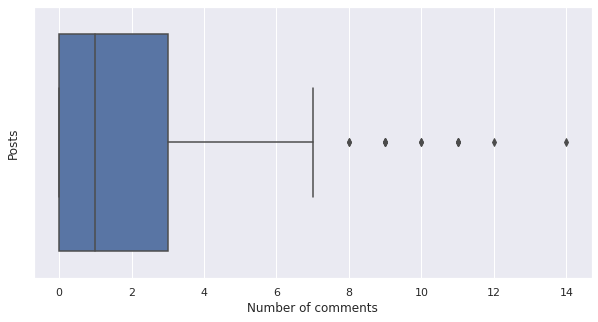

Mean:  2.179611650485437
Median:  1.0
Max:  14
Min:  0
Std:  2.8864887536439165
Var:  8.33181732491281


In [2]:
def plot_comments_per_post(df):
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x=df["n_comments"])
    ax.set(xlabel='Number of comments', ylabel='Posts')
    plt.show()
    print("Mean: ", np.mean(df["n_comments"]))
    print("Median: ", np.median(df["n_comments"]))
    print("Max: ", np.max(df["n_comments"]))
    print("Min: ", np.min(df["n_comments"]))
    print("Std: ", np.std(df["n_comments"]))
    print("Var: ", np.var(df["n_comments"]))

plot_comments_per_post(df)

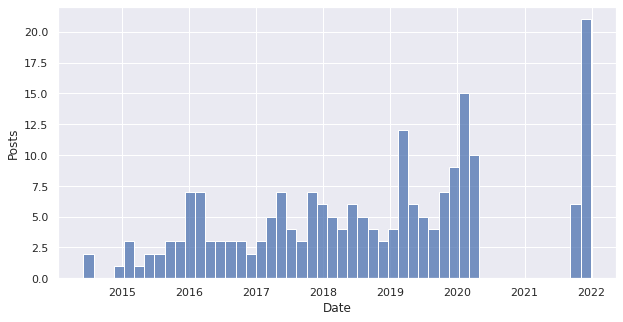

In [3]:
def plot_post_date(df):
    plt.figure(figsize=(10,5))
    ax = sns.histplot(x=df["date"],bins=50)
    ax.set(xlabel='Date', ylabel='Posts')
    plt.show()

plot_post_date(df)

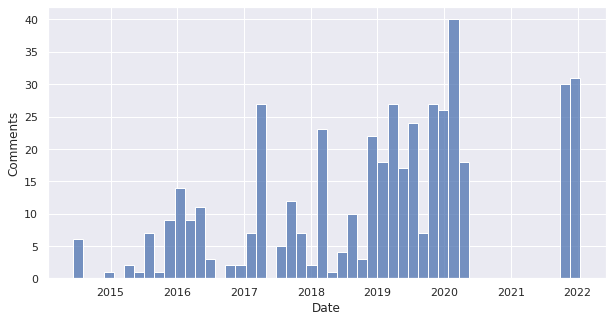

In [4]:
def plot_comments_in_df_comments(df_comments):
    plt.figure(figsize=(10,5))
    ax = sns.histplot(x=df_comments["created"],bins=50)
    ax.set(xlabel='Date', ylabel='Comments')
    plt.show()

plot_comments_in_df_comments(df_comments)

In [5]:
df_comments.head(10)

,post_id,parent_id,author,id,body,created
0,27d999,t3_27d999,Nonabelian,ci2p7a0,"As a math student, I've touched on a lot of th...",2014-06-09 03:37:16
1,27o4dh,t3_27o4dh,drdough,ci394je,"Well, it depends entirely on the syllabus for ...",2014-06-09 20:13:32
2,27o4dh,t3_27o4dh,bc87,ci2vf81,Welcome to the sub-reddit. It's been a very ve...,2014-06-09 10:39:36
3,27o4dh,t1_ci2vf81,drdough,ci395qc,Hi bc87. I'm also saddened by the state of thi...,2014-06-09 20:14:36
4,27o4dh,t1_ci2vf81,LinkFixerBotSnr,ci2vfx8,/r/math \n\n*****\n[^report ^a ^**problem**](h...,2014-06-09 10:41:28
5,27o4dh,t1_ci395qc,bc87,ci3r1ku,There's nothing wrong with this sub-reddit. I ...,2014-06-10 09:31:55
6,2s1j9p,t3_2s1j9p,VeritasOmnias,cnlsgvv,"I actually have been looking for one lately, t...",2015-01-11 21:03:32
7,2xx8vt,t3_2xx8vt,bc87,cpeda3n,CGP grey had a video on this topic.\n\nhttps:/...,2015-03-14 03:21:29
8,2xx8vt,t3_2xx8vt,bc87,crk5kbb,"Sorry but, the google link is no longer availa...",2015-05-25 10:04:05
9,2xx8vt,t1_cpeda3n,drewshaver,cptho60,Thanks for the link! I've come to understand o...,2015-03-28 12:52:04


In [73]:
df_all_nodes = pd.DataFrame()
df_all_nodes['author'] = pd.concat([df_comments["author"].drop_duplicates(), df["author"].drop_duplicates()])
df_all_nodes = df_all_nodes.drop_duplicates()

def find_type(author):
    if author in df["author"].unique():
        if author in df_comments["author"].unique():
            return "both"
        else:
            return "poster"
    else:
        return "commenter"

df_all_nodes["type"] = df_all_nodes["author"].apply(find_type)

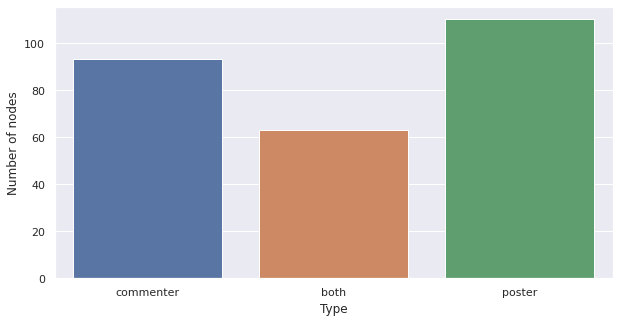

In [76]:
# plot number of nodes per type
plt.figure(figsize=(10,5)) 
ax = sns.countplot(x=df_all_nodes["type"])
ax.set(xlabel='Type', ylabel='Number of nodes')
plt.show()

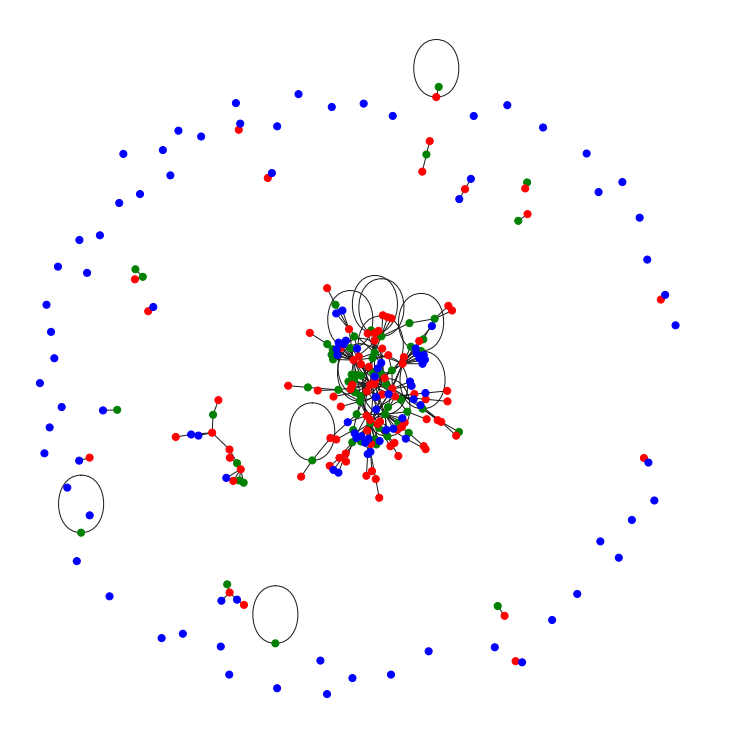

In [99]:
# add nodes from authors
G = nx.Graph()

G.add_nodes_from(df_all_nodes["author"].loc[df_all_nodes['type']=='both'], type='both')
G.add_nodes_from(df_all_nodes["author"].loc[df_all_nodes['type']=='commenter'], type='commenter')
G.add_nodes_from(df_all_nodes["author"].loc[df_all_nodes['type']=='poster'], type='poster')



color_map = []
for node in G:
    if G.nodes[node]['type'] == 'both':
        color_map.append('green')
    elif G.nodes[node]['type'] == 'commenter':
        color_map.append('red')
    else:
        color_map.append('blue')

    for p_id in df_comments.loc[df_comments['author'] == node].parent_id:
        if len(list(p_id)) > 0:
            if 't3_' in p_id:
                p_id = p_id.replace('t3_','')
                if p_id in df['id'].unique():
                    G.add_edge(node, df.loc[df['id'] == p_id].author.values[0])
            elif 't1_' in p_id:
                p_id = p_id.replace('t1_','')
                if p_id in df_comments['id'].unique():
                    G.add_edge(node, df_comments.loc[df_comments['id'] == p_id].author.values[0])

# color node
plt.figure(figsize=(10,10))
nx.draw(G, node_color=color_map, with_labels=False, node_size=50,pos=nx.spring_layout(G))

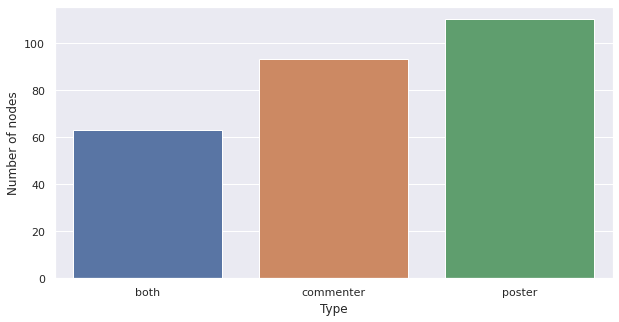

In [96]:
# plot node type
plt.figure(figsize=(10,5))
ax = sns.countplot(x=[G.nodes[node]['type'] for node in G])
ax.set(xlabel='Type', ylabel='Number of nodes')
plt.show()

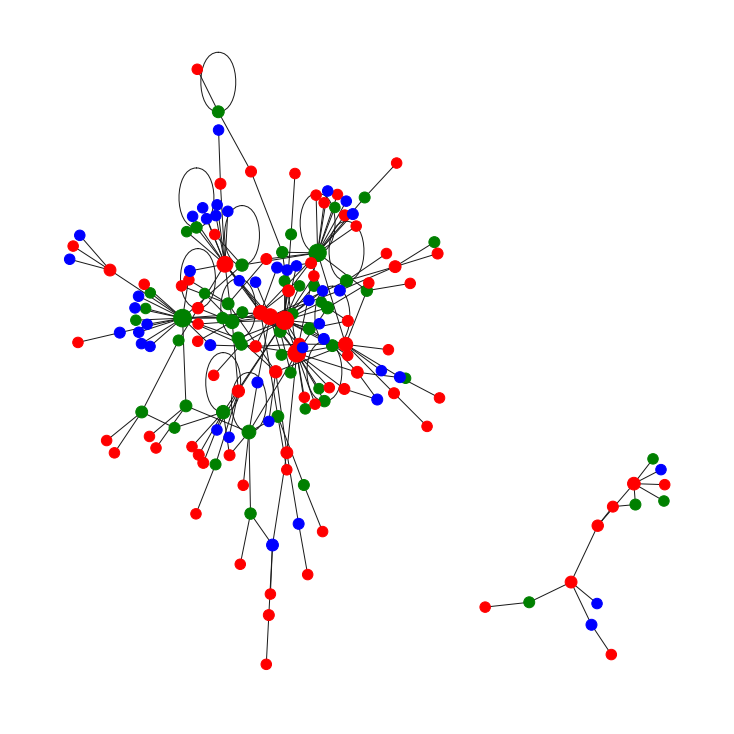

In [112]:
# copy graph
G2 = G.copy()

for component in list(nx.connected_components(G2)):
    if len(component)<6:
        for node in component:
            G2.remove_node(node)

# color nodes by type
color_map2 = []
for node in G2:
    if G2.nodes[node]['type'] == 'both':
        color_map2.append('green')
    elif G2.nodes[node]['type'] == 'commenter':
        color_map2.append('red')
    else:
        color_map2.append('blue')


# increase size of nodes depending on degree
node_size = [G2.degree(node)*10+100 for node in G2]


# plot graph
plt.figure(figsize=(10,10))
nx.draw(G2, node_color=color_map2, with_labels=False,node_size=node_size, pos=nx.spring_layout(G2))


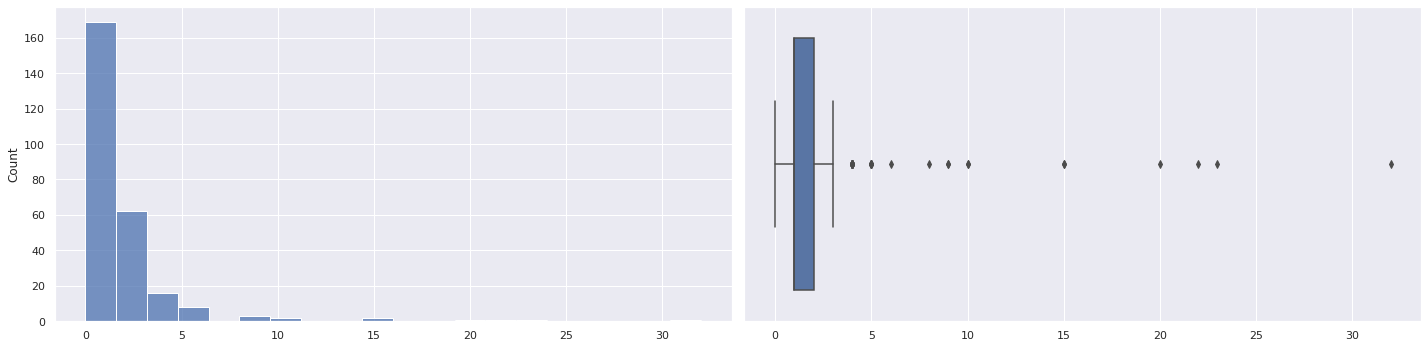

In [8]:
# plot subplots of degrees boxplot and distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(x=list(dict(G.degree()).values()),bins=20, ax=ax1)
sns.boxplot(x=list(dict(G.degree()).values()), ax=ax2)
plt.tight_layout()
plt.show()

In [11]:
G.number_of_nodes()

266

TypeError: unhashable type: 'Series'